#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

### Loading packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the data and setting column names

In [2]:
df = pd.read_csv("imdb_top_10000.txt", names = ['imdbID','Title','year','score','votes','runtime','genres'], delimiter='\t')
df.head()

imdbID                            Title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

#### Cleaning and examining the data

In [3]:
df.dtypes

imdbID      object
Title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [4]:
df.isna().sum() 

imdbID     0
Title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [5]:
df[df.genres.isna()==True] 

imdbID             Title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [6]:
df.dropna(subset=['genres'],inplace=True) 

In [7]:
df.isna().sum() 

imdbID     0
Title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [8]:
df.dtypes 

imdbID      object
Title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [9]:
df.shape

(9999, 7)

## 2. Asking Questions

Highest rated movie of specific year?

Find the Longest and shortest runtime

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [10]:
runtime =[int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime']= runtime
df.head()





imdbID                            Title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [11]:
df.dtypes

imdbID      object
Title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

In [12]:
genre_set=set()
for genre in df.genres:
  genre_set.update(genre.split('|'))

In [13]:
len(genre_set) 

24

In [14]:
for genre in genre_set:
  df[genre]=[genre in row.split("|") for row in df.genres]

In [15]:
df.head()

imdbID                            Title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Romance  Thriller  Fantasy  ...  \
0                       Crime|Drama    False     False    False  ...   
1                    Crime|Thriller    False      True    False  ...   
2            Drama|Mystery|Thriller    False      True    False  ...   
3           Action|Adventure|Sci-Fi    False     False    False  ...   
4  Action|Adventure|Sci-Fi|Thriller    False      True    False  ...   

   Adventure   News  Western  Family  Horror  Crime  Adult  Music  Sci-Fi  \
0      False  False    False   False   False   True  False  False   False   
1      False  False    False   False   False   True  False  False   False   
2      False  False    False   False   False  False  False  False   False   
3       True  False    False   False   False  False  False  False    True   
4       True  False    False   False   False  False  False  False    True   

   Mystery  
0    False  
1    False  
2     True  
3    False  
4    False  

[5 rows x 31 columns]

In [16]:
##Get the first Title
test_string = df.Title[0]
test_string



'The Shawshank Redemption (1994)'

In [17]:
df['Title'] = [t[0:-7] for t in df.Title]
df.head()


imdbID                     Title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Romance  Thriller  Fantasy  ...  \
0                       Crime|Drama    False     False    False  ...   
1                    Crime|Thriller    False      True    False  ...   
2            Drama|Mystery|Thriller    False      True    False  ...   
3           Action|Adventure|Sci-Fi    False     False    False  ...   
4  Action|Adventure|Sci-Fi|Thriller    False      True    False  ...   

   Adventure   News  Western  Family  Horror  Crime  Adult  Music  Sci-Fi  \
0      False  False    False   False   False   True  False  False   False   
1      False  False    False   False   False   True  False  False   False   
2      False  False    False   False   False  False  False  False   False   
3       True  False    False   False   False  False  False  False    True   
4       True  False    False   False   False  False  False  False    True   

   Mystery  
0    False  
1    False  
2     True  
3    False  
4    False  

[5 rows x 31 columns]

## 4. EDA

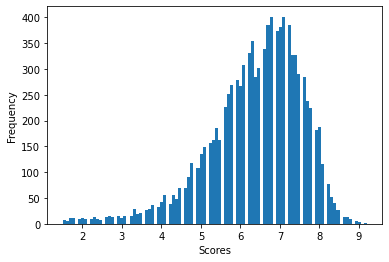

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.score
plt.hist(x,bins=100)
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

we learn that more scores are more frequent in and around 6-8

In [23]:
small_df = df[['Title', 'runtime']]
run_time = small_df['runtime']
print("Longest runtime")
print(run_time.max())
print("Shortest runtime")
print(run_time.min())


Longest runtime
450
Shortest runtime
0


## 5. Determining Best Movies

In [41]:
movies=df.groupby('year',sort=False)
year_1994=movies.get_group(1994)  
best_rated_movie=year_1994[year_1994['score']==year_1994.score.max()]
print(best_rated_movie)

      imdbID                     Title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   

        genres  Romance  Thriller  Fantasy  ...  Adventure   News  Western  \
0  Crime|Drama    False     False    False  ...      False  False    False   

   Family  Horror  Crime  Adult  Music  Sci-Fi  Mystery  
0   False   False   True  False  False   False    False  

[1 rows x 31 columns]


We know now that the highest rated movies are The Shawshank Redemption.

## 6. Trends in Popularity of Genres

In [26]:
genredf = df[list(genre_set)]
genredf.shape

(9999, 24)

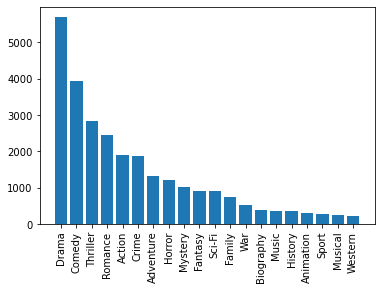

In [28]:
genrecount = genredf.sum()
genrecount = genrecount.sort_values(ascending=False)
plt.bar(genrecount.index[:20],genrecount[:20])
plt.xticks(rotation=90)
plt.show()

We know from this graph that the most popular genre by count is Drama from 24 other genres.